## Development-of-an-Intelligent-Based-Algorithm-for-the-Detection-and-Identification-of-Drowsy-Driver


### Installing Ultralytics Library

In [ ]:
# Checks if a GPU is available
import torch
if torch.cuda.is_available():
    print("GPU is available!")
else:
    print("GPU is not available.")

# Displays GPU details
!nvidia-smi


GPU is available!
Tue Dec 17 23:29:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+-------

### Mounting the Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


### Counts The Number of Image Files in my Google Drive

In [ ]:
# -- imports the drive module from google colab's package to enable mounting of drive in current environment

from google.colab import drive

# -- imports the operating system library used for handling file paths and interacting with the operating system

import os

# Defines folder paths in your Google Drive
base_path = "/content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset"  # Update if your folders are in a subdirectory
folders = ["test", "train", "val"]

# Defines the allowed image file extensions
image_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif", ".tiff"}

# Function to count image files in a folder
def count_image_files(folder_path):
    count = 0
    for root, _, files in os.walk(folder_path):
        count += sum(1 for file in files if os.path.splitext(file)[-1].lower() in image_extensions)
    return count

# Loops through each folder and count images
folder_counts = {}
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        folder_counts[folder] = count_image_files(folder_path)
    else:
        folder_counts[folder] = "Folder not found"

# Displays the results
for folder, count in folder_counts.items():
    print(f"{folder}: {count}")


test: 1046
train: 18835
val: 1046


### Switching Directories

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install ultralytics==8.2.103 -q # queitly installs the the ultralytics YOLO package

# -- imports the display module from IPython package

from IPython import display

display.clear_output() # clears the current cell's output to keep the notebook interface clean

# -- imports the installed ultralytics package containing YOLO model and utilities

import ultralytics 

ultralytics.checks() # runs system check to verify dependencies and environment compatibility with YOLO

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 32.7/235.7 GB disk)


In [ ]:
# -- imports the YOLO class from the ultralytics library to load, train, and run the (YOLO) model

from ultralytics import YOLO

# -- imports Image and clear_output functions from IPython for displaying images and clearing outputs in the notebook

from IPython.display import display, Image

### Importing The Dataset from Roboflow

In [ ]:
!pip install roboflow # installs the roboflow library used for managing the dataset

from roboflow import Roboflow # imports the installed roboflow library
rf = Roboflow(api_key="MScLQLRgmKqF91IrCB0D") # creates an instance of roboflow to access the dataset using the custom API key
project = rf.workspace("driver-drowsiness-detection-cfbe0").project("traffic-control-with-cv") # defines the workspace and specific project name
version = project.version(1) # defines the versiono of the dataset to download
dataset = version.download("yolov8") # downloads the dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic-Control-with-CV-1 in yolov8:: 100%|██████████| 10652/10652 [01:29<00:00, 118.81it/s]


### Training the Model

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/data.yaml epochs=100 imgsz=640

New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_

### Plotting The Confusion Matrix

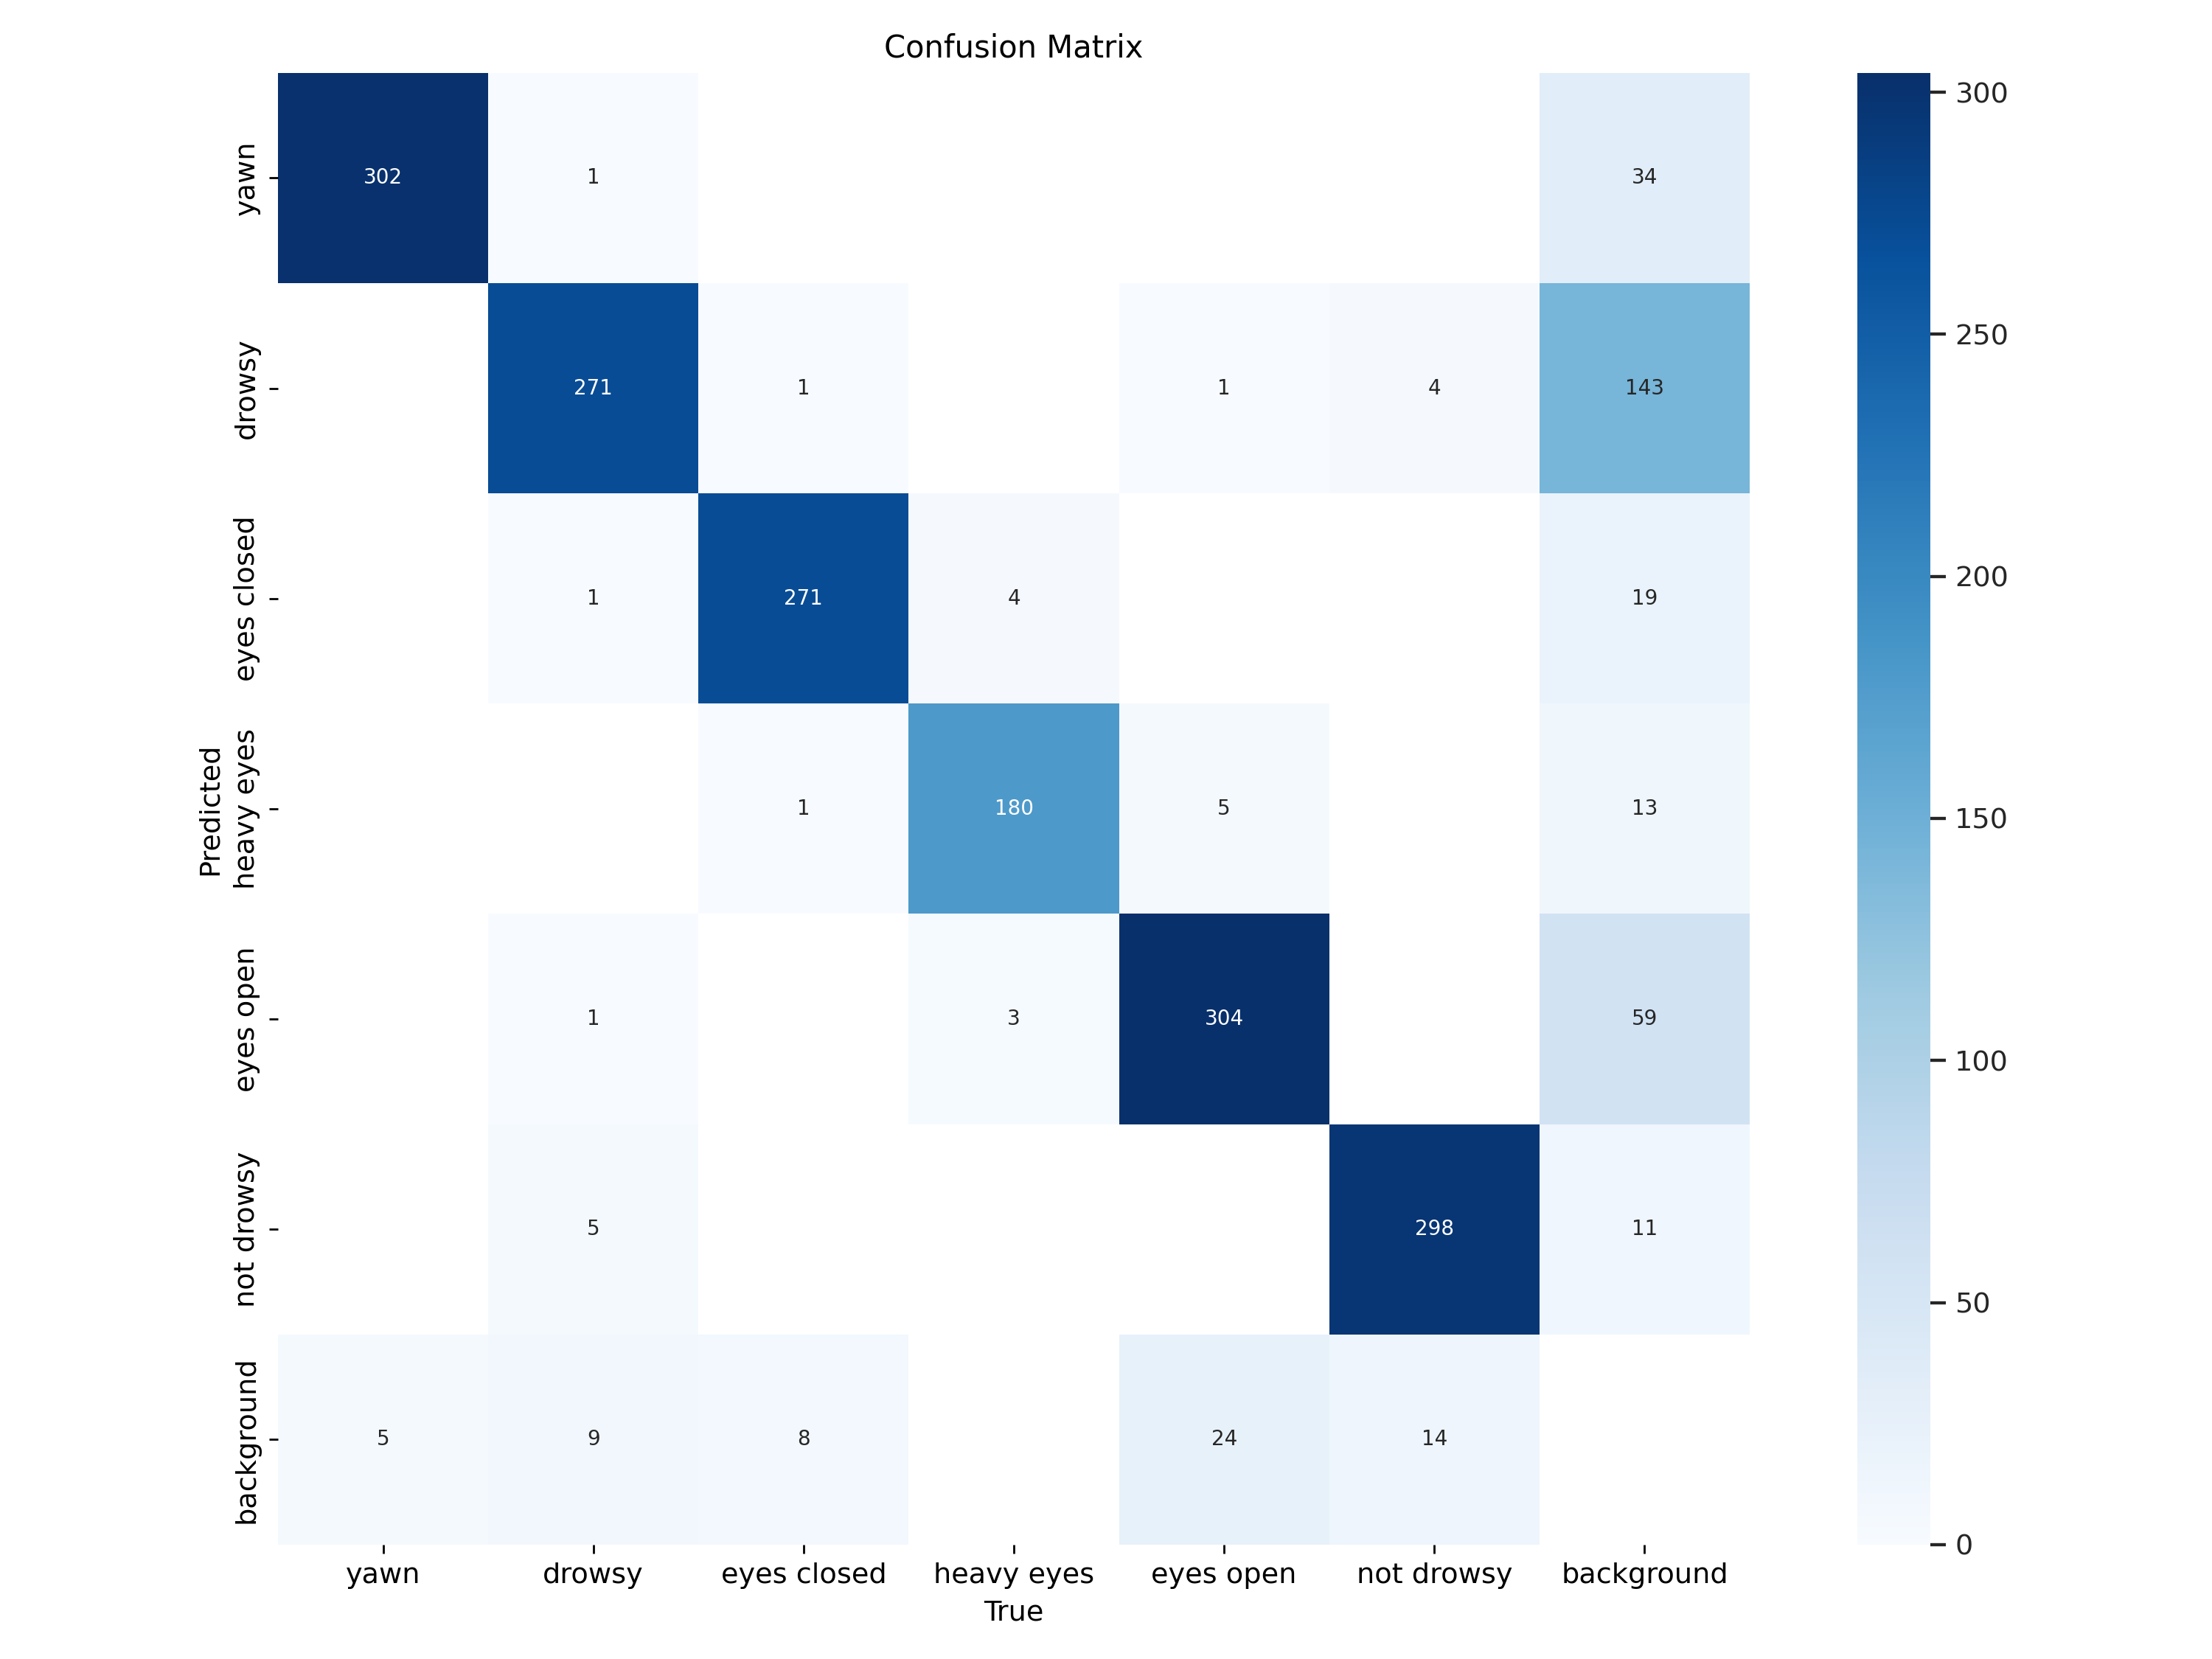

In [ ]:
Image(filename='/content/drive/MyDrive/runs/detect/train3/confusion_matrix.png', width=600) # loads the confusion matrix image result

### Plotting Trianing Results

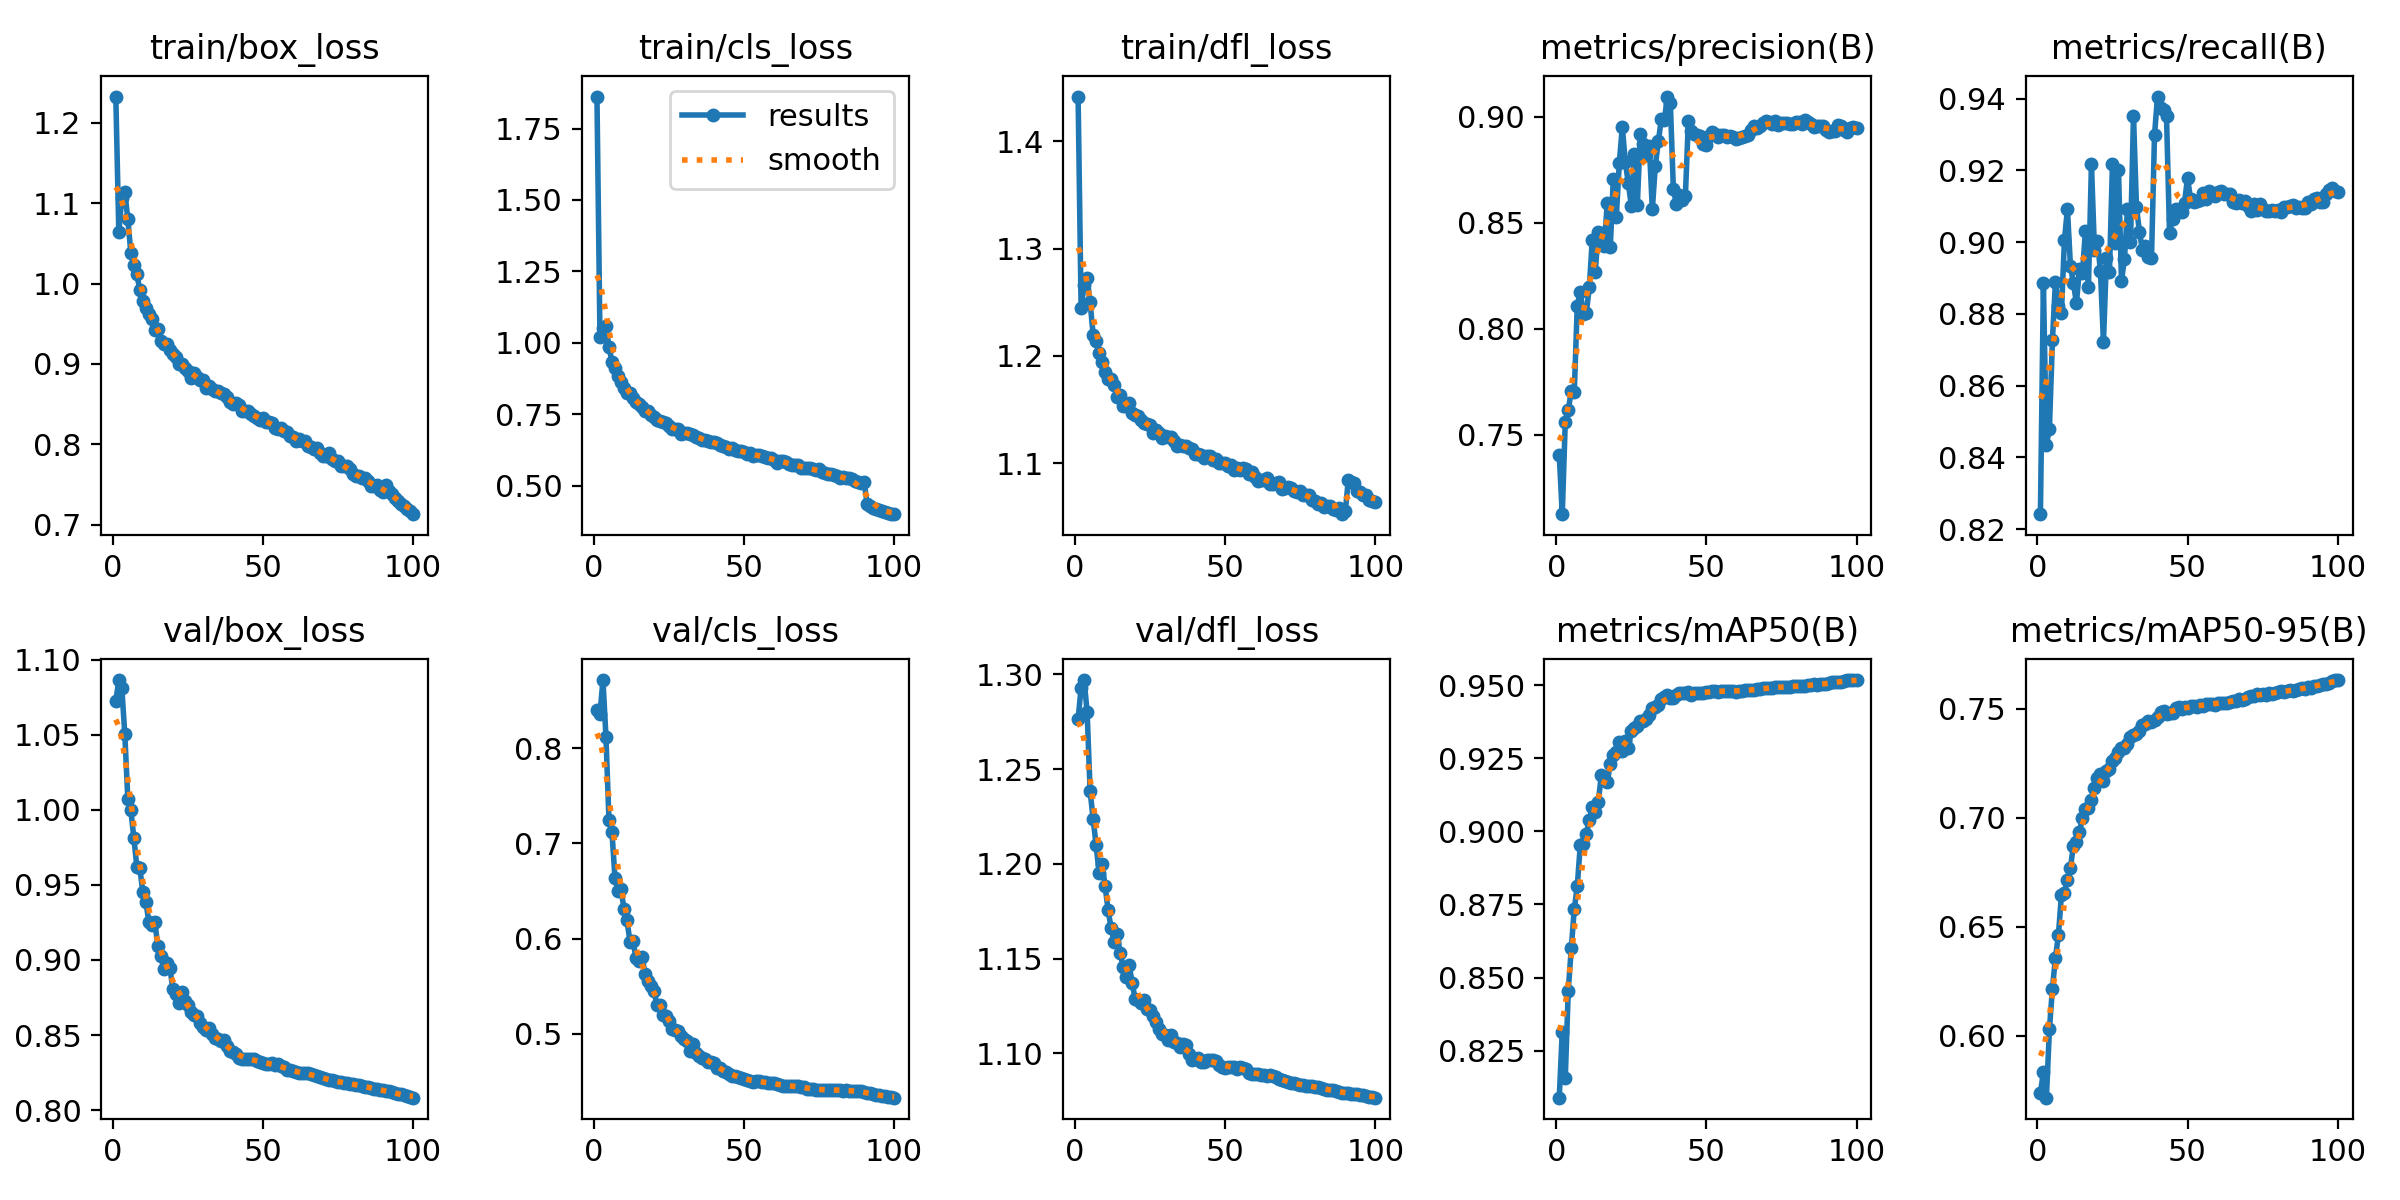

In [ ]:
Image(filename='/content/drive/MyDrive/runs/detect/train3/results.png', width=600) # loads the evaluation metrics image results

### Testing the Model on the Validation Set

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/runs/detect/train3/weights/best.pt data=/content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/data.yaml

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/val/labels.cache... 1046 images, 0 backgrounds, 0 corrupt: 100% 1046/1046 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 66/66 [00:19<00:00,  3.35it/s]
                   all       1046       1713      0.895      0.914      0.952      0.763
                  yawn        307        307       0.92      0.975      0.981      0.701
                drowsy        286        288       0.83      0.763      0.894      0.728
           eyes closed        281        281      0.928      0.957      0.972      0.772
            heavy eyes        187        187      0.928      0.968      0.991      0.827
             eyes open        333        334       0.83       0.89      0.899      0.693
      

### Performing Inferencing/Predictions on Images

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/runs/detect/train3/weights/best.pt conf=0.5 source=/content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs

image 1/1046 /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images/10.png: 640x640 1 not drowsy, 16.3ms
image 2/1046 /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images/10005.png: 640x640 1 yawn, 1 eyes open, 16.3ms
image 3/1046 /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images/10023.png: 640x640 1 yawn, 1 drowsy, 1 eyes open, 16.3ms
image 4/1046 /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images/10081.png: 640x640 1 yawn, 1 drowsy, 1 eyes closed, 16.3ms
image 5/1046 /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images/10121.png: 640x640 1 yawn, 1 drowsy, 1 eyes open, 16.3ms
image 6/1046 /content/drive/MyDrive/Driver_Drowsiness_Complete_Dataset/test/images/10123.png: 640x640 1 drowsy, 1 eyes closed, 16.3ms
image 7/1046 /content/

### Displaying the Predicted Images

In [ ]:
# -- imports the glob module for retrieving file paths matching a specifiedpattern

import glob

# -- imports Image and clear_output functions from IPython for displaying images and clearing outputs in the notebook

from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/runs/detect/predict/*.jpg'): # iterates through all .jpg images in the specified folder
      display(Image(filename=image_path, width=600)) # displays each image with a width of 600 pixels in the cell's output

### Performing Inferencing/Predictions on Videos

In [ ]:
# -- imports the cv2_imshow function to display OpenCV images correctly in the Google Colab Notebook

from google.colab.patches import cv2_imshow

# -- imports YOLO from the ultralytics package

from ultralytics import YOLO  

# -- imports OpenCV library for handling images and image processing

import cv2

# Loads the YOLO model
model = YOLO('/content/drive/MyDrive/runs/detect/train3/weights/best.pt')  

# Opens the video file 
video_source = "/content/drive/MyDrive/runs/detect/train3/weights/Drowsy Driving Danger_ How Sleepiness Can Wreck Your Ride!.mp4"  
cap = cv2.VideoCapture(video_source)

# Checks to see if the video source opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Gets the video frame's width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Defines the codec and creates a VideoWriter object to save the output video
output_file = '/content/drive/MyDrive/runs/detect/train3/weights/Drowsiness_detection9_video.avi'  
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_file, fourcc, 20.0, (frame_width, frame_height))

# Processes video frames
while cap.isOpened():
    ret, frame = cap.read()  # reads a single frame from the video at each iteration
    if not ret:
        break  # breaks the loop if no frames are returned

    
    results = model(frame) # the model makes the prediction/inference here

    # Draws bounding box results on the frame
    for result in results:  # iterates over detected objects
        for box in result.boxes:  # iterates through detected boxes
            x1, y1, x2, y2 = box.xyxy[0]  # unpacks box coordinates
            conf = box.conf[0]  # gets the confidence score
            cls = int(box.cls[0])  # gets the class ID
            label = f'{result.names[cls]}: {conf:.2f}'  # uses the model-inferred class name for label
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # draws the bounding box
            cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # draws label

    # Writes the frame to the output video file
    out.write(frame)

    # Displays the frame with detections
    cv2_imshow(frame)

    # Breaks the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Releases video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"Output video saved as {output_file}")


In [1]:
print("© Rizama Victor")

© Rizama Victor
